In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
home_credit_des = pd.read_csv('HomeCredit_columns_description.csv',encoding='ISO-8859-1')

In [3]:
home_credit_des

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [4]:
application_train = pd.read_csv('application_train.csv')

In [5]:
application_train.duplicated().sum()

0

In [6]:
application_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
application_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
application_train.shape

(307511, 122)

In [11]:
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(application_train)

In [12]:
null_df

,Feature,Percentage
0,COMMONAREA_MEDI,69.872297
1,COMMONAREA_AVG,69.872297
2,COMMONAREA_MODE,69.872297
3,NONLIVINGAPARTMENTS_MEDI,69.432963
4,NONLIVINGAPARTMENTS_MODE,69.432963
...,...,...
62,EXT_SOURCE_2,0.214626
63,AMT_GOODS_PRICE,0.090403
64,AMT_ANNUITY,0.003902
65,CNT_FAM_MEMBERS,0.000650


<AxesSubplot:xlabel='Percentage', ylabel='Feature'>

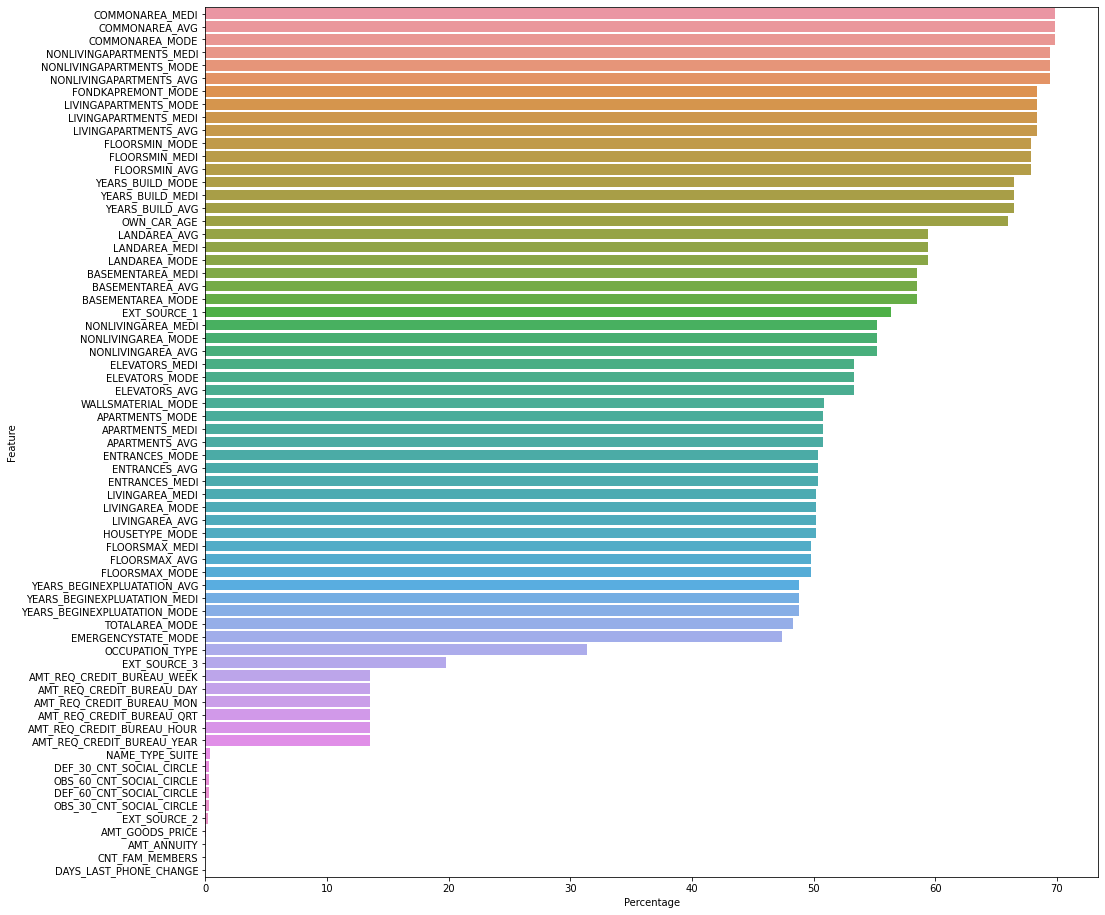

In [13]:

plt.figure(figsize=(16,16))
sns.barplot(x=  null_df["Percentage"] , y= null_df["Feature"] )

# Outliers

In [14]:
numerical_col = application_train.select_dtypes(include='number').columns
len(numerical_col)

106

/var/folders/sh/k0sxj_8d47153mj1tws7b_7h0000gn/T/ipykernel_50536/1191476894.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ma

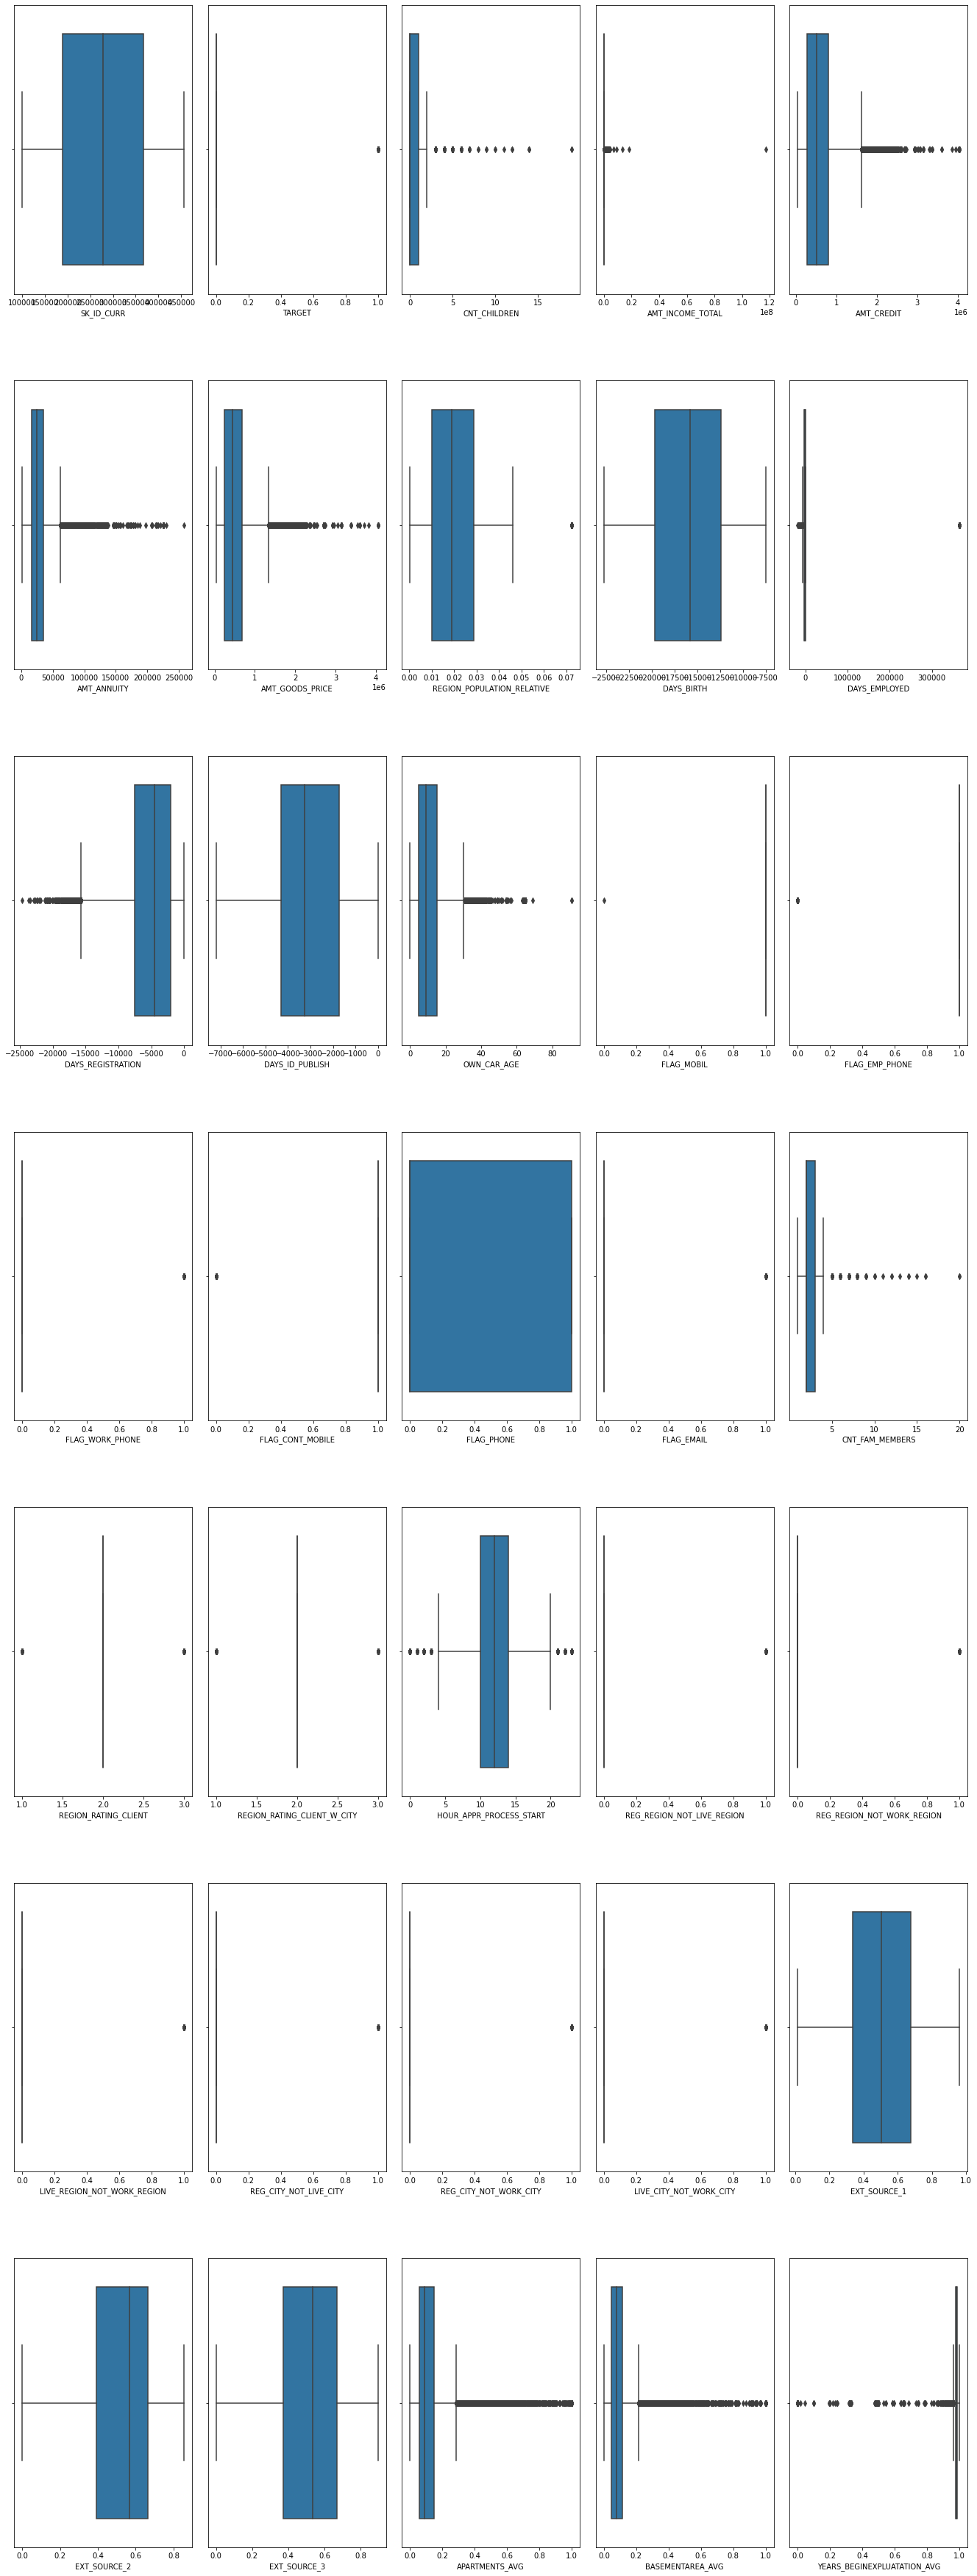

In [15]:
fig , axes = plt.subplots(nrows=7, ncols=5, constrained_layout=True)                 # Plot Configuration 
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)


for ax, column in zip(axes.flatten(),numerical_col):        #Using For loop 

    sns.boxplot(application_train[column],ax=ax)   #Ploting

# CNT_CHILDREN có giá trị ngoại lệ khi có con trên 5 tuổi.
# IQR cho AMT_INCOME_TOTAL rất ít và nó có một số lượng lớn các ngoại lệ.
# Phần tư thứ ba của AMT_CREDIT lớn hơn so với phần tư thứ nhất, có nghĩa là phần lớn Số tiền Tín dụng của khoản vay của khách hàng nằm trong phần tư thứ ba. Và có một số lượng lớn các trường hợp ngoại lệ có mặt trong AMT_CREDIT.
# Phần tư thứ ba AMT_ANNUITY lớn hơn một chút so với phần tư thứ nhất và có một số lượng lớn các giá trị ngoại lệ.
# Phần tư thứ ba của AMT_GOODS_PRICE, DAYS_REGISTRATION VÀ DAYS_LAST_PHONE_CHANGE lớn hơn so với phần tư thứ nhất và tất cả đều có số lượng lớn các ngoại lệ.
# IQR cho DAYS EMPLOYED rất ít. Hầu hết các giá trị ngoại lệ có mặt dưới 25000. Và một giá trị ngoại lệ hiện tại là 375000.
# Từ sơ đồ của CNT_FAM_MEMBERS, chúng ta có thể nói rằng hầu hết các khách hàng có 4 thành viên gia đình. Có một số ngoại lệ hiện tại.
# DAYS_BIRTH, DAYS_ID_PUBLISH và EXT_SOURCE_2, EXT_SOURCE_3 không có bất kỳ ngoại lệ nào.
# Boxplot for DAYS_EMPLOYED ,OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON, 
# FLAG_OWN_CAR: Nó không có định lượng Thứ nhất và Thứ ba và các giá trị nằm trong IQR, Vì vậy, ta có thể kết luận rằng hầu hết khách hàng đều sở hữu một chiếc ô tô
# FLAG_OWN_REALTY: Nó không có định lượng First và Third và các giá trị nằm trong IQR, Vì vậy, ta có thể kết luận rằng hầu hết khách hàng sở hữu Nhà / Căn hộ

In [16]:
a = application_train['NAME_CONTRACT_TYPE'].value_counts()

In [17]:
a = pd.DataFrame(a)

Text(0.5, 1.0, 'Did People Repay on Time ?')

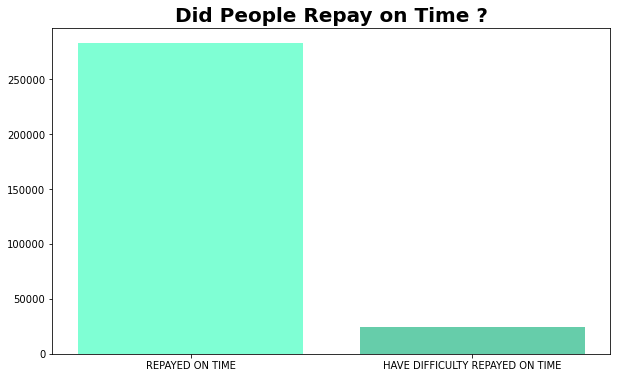

In [18]:
a = application_train["TARGET"].value_counts()
df = pd.DataFrame(a).reset_index()
df
fig,ax0 = plt.subplots(figsize = (10,6))
ax0.bar(df.index,df.TARGET,color = ['#7FFFD4', '#66CDAA'])
ax0.set_xticks([0,1])
x= ["REPAYED ON TIME", 'HAVE DIFFICULTY REPAYED ON TIME' ]
plt.xticks([0,1], x)
plt.title('Did People Repay on Time ?',size = 20,weight ='bold')

# Đa số mọi người trả đúng hạn
# Tuy nhiên ở đây xảy ra trường hợp mất cân bằng dữ liệu (imbalanced dataset)
# Có nhiều khoản vay được hoàn trả đúng hạn hơn các khoản vay không được hoàn trả. Khi ta cho vào Machine Learning, chúng ta có thể cân nhắc các lớp bằng cách visualize lại để phản ánh sự mất cân bằng này.

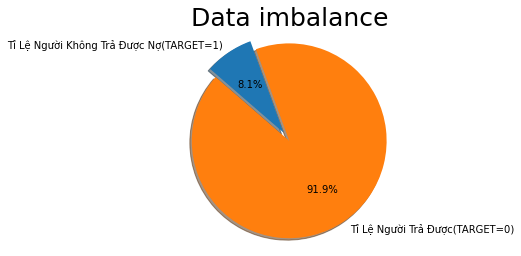

In [19]:
count1 = 0 
count0 = 0
for i in application_train['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(application_train['TARGET']))*100
count0 = (count0/len(application_train['TARGET']))*100

x = ['Tỉ Lệ Người Không Trả Được Nợ(TARGET=1)','Tỉ Lệ Người Trả Được(TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  #Vẽ hình tròn
plt.title('Data imbalance',fontsize=25)
plt.show()

In [20]:
import phik

categorical_columns = ['TARGET','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                                   'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
                                  'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                                   'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
                                'LIVE_CITY_NOT_WORK_CITY']+ ['FLAG_DOCUMENT_' + str(i) for i in range(2,22)] + application_train.dtypes[application_train.dtypes == 'object'].index.tolist()

phik_matrix = application_train[categorical_columns].phik_matrix()
phik_matrix

interval columns not set, guessing: ['TARGET', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


,TARGET,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
TARGET,1.000000,0.000000,0.072087,0.044678,0.000000,0.037258,0.000000,0.035450,0.036699,0.008207,...,0.046954,0.056043,0.051107,0.102846,0.005163,0.089164,0.018009,0.007787,0.027739,0.018600
FLAG_MOBIL,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007356,0.000000,0.000000,NaN,0.000000,0.012408,NaN,0.000000,0.000000,0.000000
FLAG_EMP_PHONE,0.072087,0.000000,1.000000,0.359031,0.019779,0.025162,0.098014,0.022789,0.024047,0.057399,...,0.114027,0.348342,0.153435,0.003758,0.026476,1.000000,0.011698,0.010477,0.010839,0.004357
FLAG_WORK_PHONE,0.044678,0.000000,0.359031,1.000000,0.033623,0.444297,0.017845,0.007271,0.008711,0.101028,...,0.014523,0.096055,0.037471,0.034673,0.028002,0.307648,0.016835,0.003307,0.022578,0.007882
FLAG_CONT_MOBILE,0.000000,0.000000,0.019779,0.033623,1.000000,0.009274,0.007648,0.010843,0.010489,0.000000,...,0.017741,0.010344,0.000000,0.026862,0.017203,0.026142,0.013665,0.000000,0.000000,0.000000
FLAG_PHONE,0.037258,0.000000,0.025162,0.444297,0.009274,1.000000,0.022822,0.059214,0.055883,0.001524,...,0.025708,0.041694,0.051404,0.064185,0.014519,0.055749,0.033626,0.013751,0.040895,0.030869
FLAG_EMAIL,0.000000,0.000000,0.098014,0.017845,0.007648,0.022822,1.000000,0.039739,0.037731,0.029036,...,0.073338,0.045771,0.021435,0.098796,0.005542,0.098638,0.014421,0.004328,0.021908,0.012931
REGION_RATING_CLIENT,0.035450,0.000000,0.022789,0.007271,0.010843,0.059214,0.039739,1.000000,0.998765,0.032304,...,0.095420,0.055506,0.205422,0.124169,0.026476,0.190183,0.042036,0.084859,0.155346,0.022927
REGION_RATING_CLIENT_W_CITY,0.036699,0.000000,0.024047,0.008711,0.010489,0.055883,0.037731,0.998765,1.000000,0.030482,...,0.094973,0.057623,0.204883,0.124536,0.025151,0.189217,0.045503,0.070509,0.144625,0.020711
REG_REGION_NOT_LIVE_REGION,0.008207,0.000000,0.057399,0.101028,0.000000,0.001524,0.029036,0.032304,0.030482,1.000000,...,0.038369,0.052314,0.129295,0.040761,0.002798,0.115167,0.000000,0.002047,0.006241,0.000000


/var/folders/sh/k0sxj_8d47153mj1tws7b_7h0000gn/T/ipykernel_50536/1299520955.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(phik_matrix, dtype=np.bool)


<AxesSubplot:>

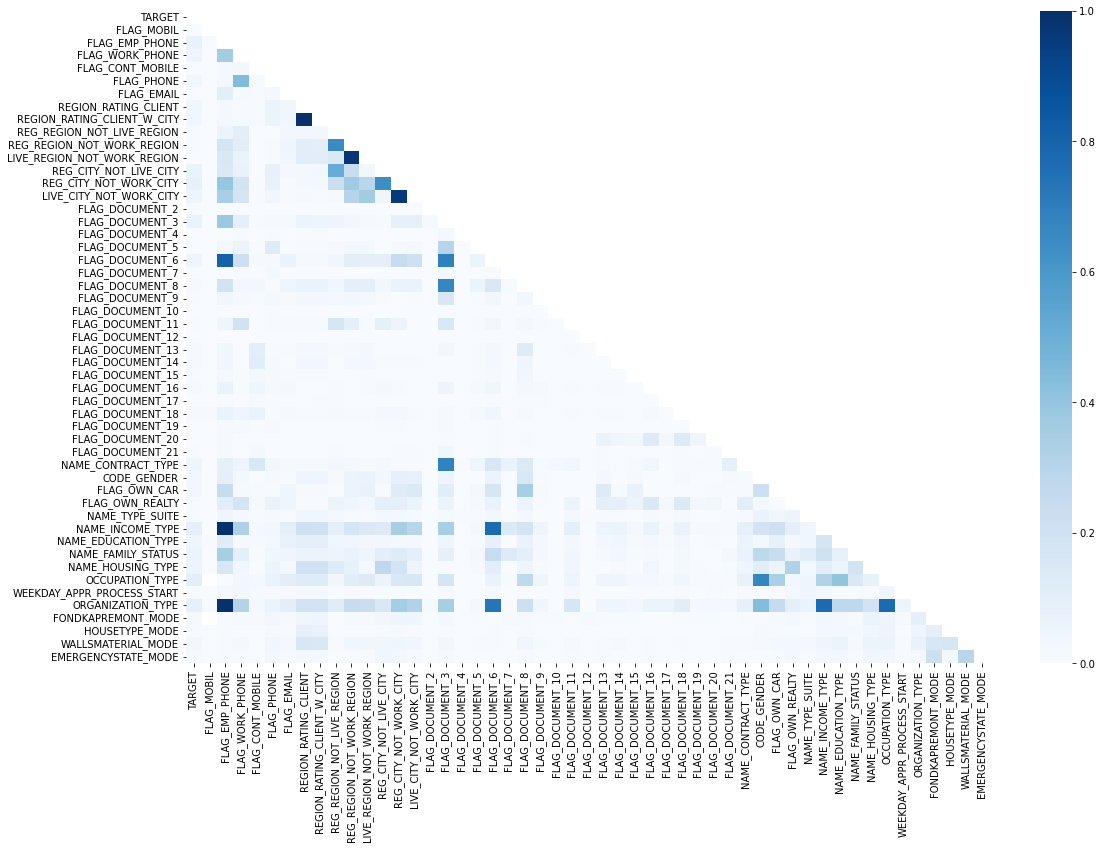

In [21]:
mask = np.zeros_like(phik_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(18,12))
sns.heatmap(phik_matrix,mask= mask, cmap= 'Blues')

In [22]:
phik_matrix.iloc[:, 0].sort_values(ascending= False)

TARGET                         1.000000
OCCUPATION_TYPE                0.102846
ORGANIZATION_TYPE              0.089164
NAME_INCOME_TYPE               0.084831
REG_CITY_NOT_WORK_CITY         0.079946
FLAG_EMP_PHONE                 0.072087
REG_CITY_NOT_LIVE_CITY         0.069588
FLAG_DOCUMENT_3                0.069525
NAME_FAMILY_STATUS             0.056043
NAME_HOUSING_TYPE              0.051107
LIVE_CITY_NOT_WORK_CITY        0.050956
NAME_CONTRACT_TYPE             0.048399
NAME_EDUCATION_TYPE            0.046954
FLAG_DOCUMENT_6                0.044791
FLAG_WORK_PHONE                0.044678
FLAG_PHONE                     0.037258
REGION_RATING_CLIENT_W_CITY    0.036699
REGION_RATING_CLIENT           0.035450
FLAG_OWN_CAR                   0.034179
CODE_GENDER                    0.032921
WALLSMATERIAL_MODE             0.027739
EMERGENCYSTATE_MODE            0.018600
FONDKAPREMONT_MODE             0.018009
FLAG_DOCUMENT_16               0.017927
FLAG_DOCUMENT_13               0.017812


In [23]:
"""Some of the highly correlated Category pairs are:

    REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT - This is understandable as they would more or less tell a similar story.
    LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION
    NAME_INCOME_TYPE, ORGANIZATION_TYPE and FLAG_EMP_PHONE

We can also see some correlation between the Organization type and the income type of a client. Similarly we see a correlation between the Occupation Type and the Organization Type too.
We find that the category OCCUPATION_TYPE, ORGANIZATION_TYPE, NAME_INCOME_TYPE, REG_CITY_NOT_WORK_CITY are some of the highest correlated categories with the TARGET variable. These maybe important in the classification task, and would need further EDA"""

'Some of the highly correlated Category pairs are:\n\n    REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT - This is understandable as they would more or less tell a similar story.\n    LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION\n    NAME_INCOME_TYPE, ORGANIZATION_TYPE and FLAG_EMP_PHONE\n\nWe can also see some correlation between the Organization type and the income type of a client. Similarly we see a correlation between the Occupation Type and the Organization Type too.\nWe find that the category OCCUPATION_TYPE, ORGANIZATION_TYPE, NAME_INCOME_TYPE, REG_CITY_NOT_WORK_CITY are some of the highest correlated categories with the TARGET variable. These maybe important in the classification task, and would need further EDA'

In [24]:
numeric_col = [col for col in application_train.columns if col not in categorical_columns]
numeric_col_corr = application_train[numeric_col].phik_matrix()

interval columns not set, guessing: ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BU

/var/folders/sh/k0sxj_8d47153mj1tws7b_7h0000gn/T/ipykernel_50536/610470816.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(numeric_col_corr, dtype=np.bool)


<AxesSubplot:>

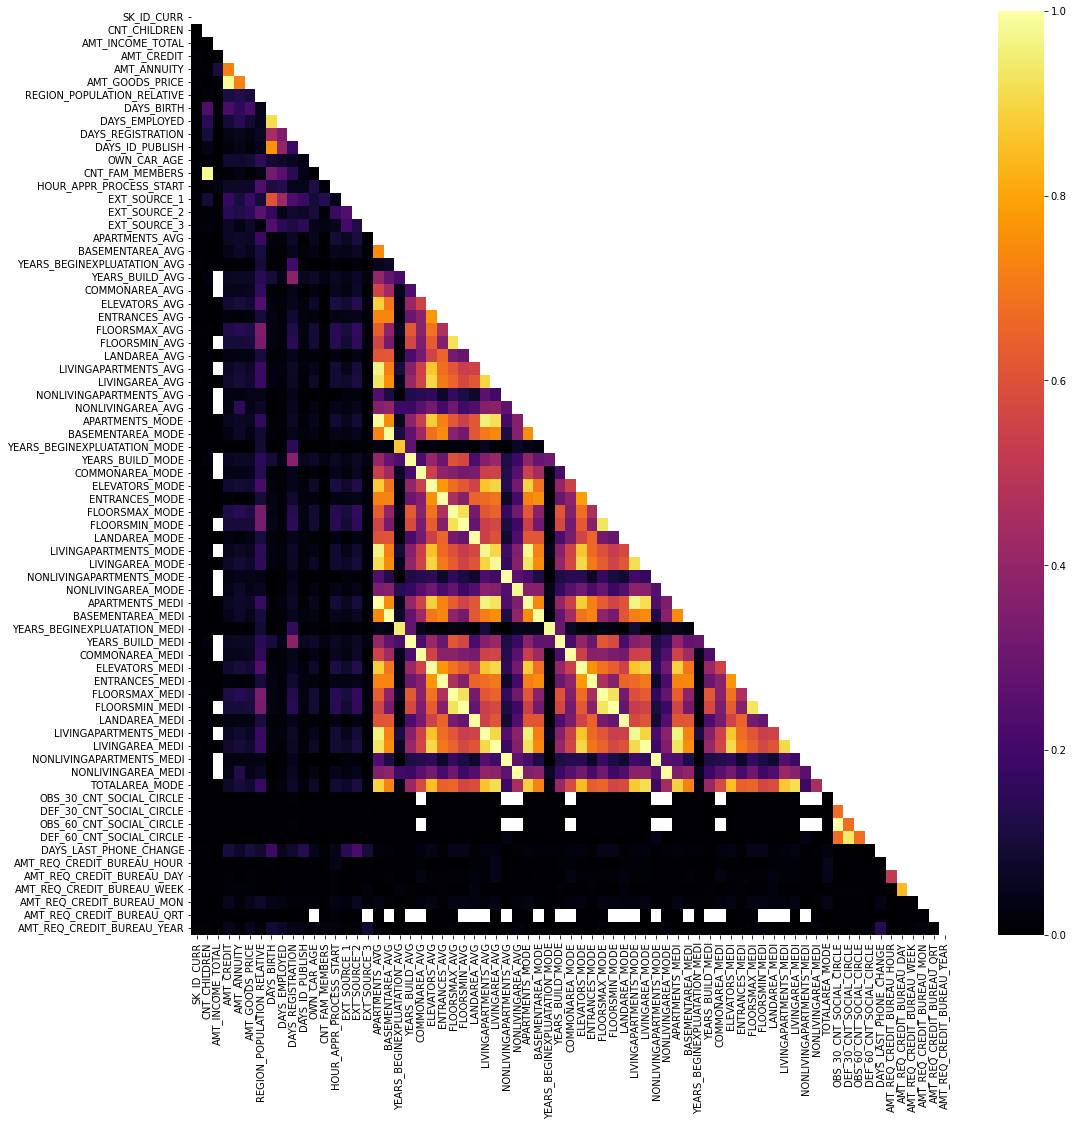

In [25]:
mask = np.zeros_like(numeric_col_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(17,17))
sns.heatmap(numeric_col_corr, mask= mask, cmap= 'inferno')

In [26]:
"""
high correlation between AMT_GOODS_PRICE and AMT_CREDIT, between DAYS_EMPLOYED and DAYS_BIRTH.
"""

'\nhigh correlation between AMT_GOODS_PRICE and AMT_CREDIT, between DAYS_EMPLOYED and DAYS_BIRTH.\n'

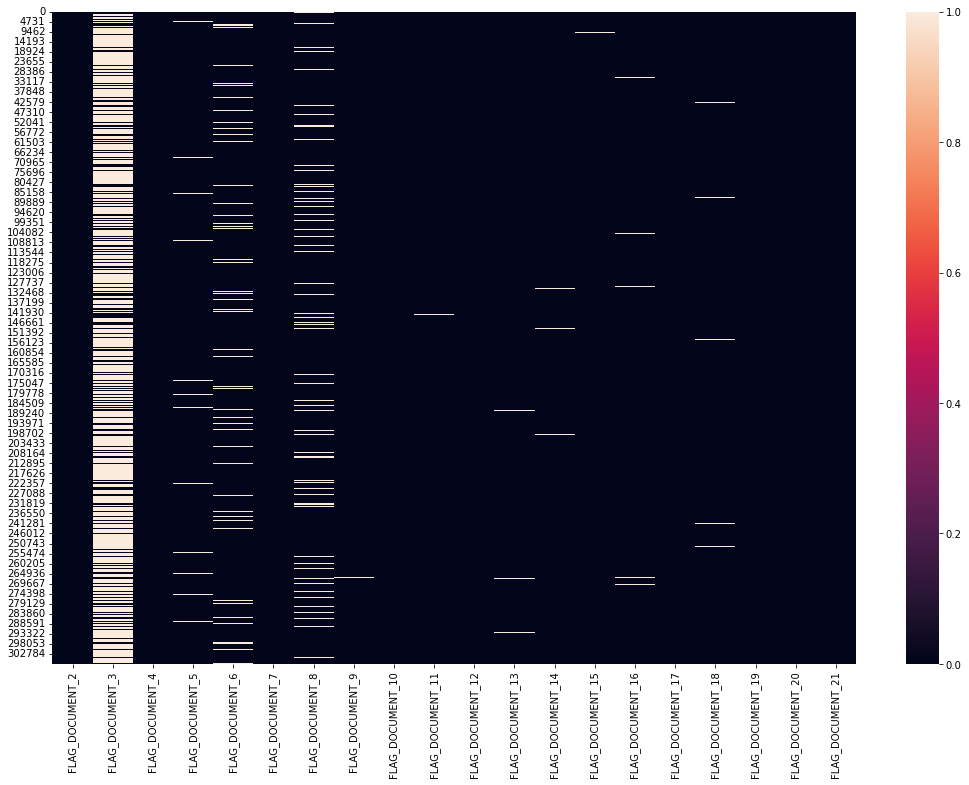

In [27]:
starting_idx = application_train.columns.get_loc("FLAG_DOCUMENT_2")
ending_idx = application_train.columns.get_loc("FLAG_DOCUMENT_21")+1

plt.figure(figsize=(18,12))
sns.heatmap(application_train.iloc[:,starting_idx:ending_idx])
plt.show()
## DOCUMENT_3,có vẻ được cung cấp trong hầu hết các khoản vay
## coi như tất cả các các DOCUMENT khác không quan trọng

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Defaulter')]

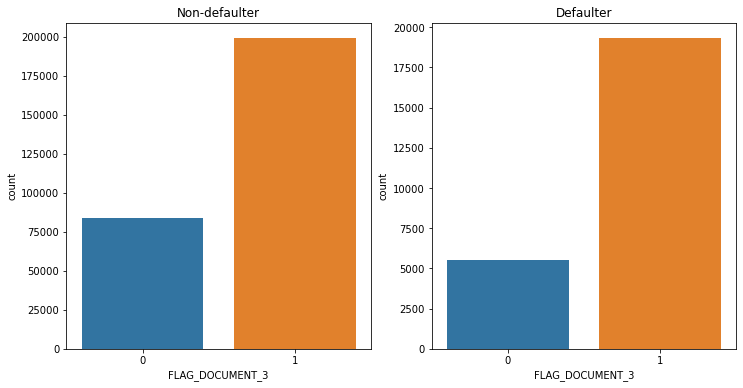

In [28]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(application_train[application_train["TARGET"] == 0]["FLAG_DOCUMENT_3"], ax= ax[0]).set(title = "Non-defaulter")
sns.countplot(application_train[application_train["TARGET"] == 1]["FLAG_DOCUMENT_3"], ax= ax[1]).set(title = "Defaulter")

# tỉ lệ cung cấp DOCUMENT_3 trong cả 2 trường hợp là gần giống nhau vậy nên các biến DOCUMENT có thể drop do không có quá nhiều ảnh hưởng lên biến TARGET

In [29]:
 application_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Text(0.89, 109000, '105059')

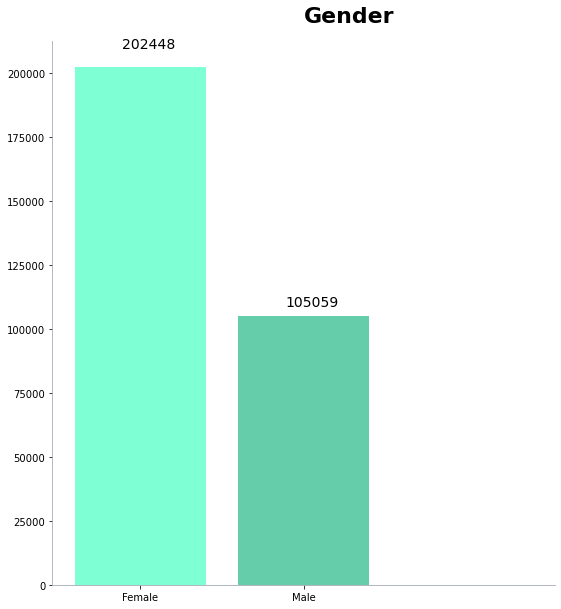

In [30]:
a = application_train["CODE_GENDER"].value_counts()
df = pd.DataFrame(a).reset_index()
df
fig,ax0 = plt.subplots(figsize = (9,10))
ax0.bar(df.index,df.CODE_GENDER,color = ['#7FFFD4', '#66CDAA','blue'])
x= ["Female", 'Male' ]
plt.xticks([0,1],x)
ax0.spines[['top', "right"]].set_visible(False)
ax0.text(1, 220000, 'Gender', size=22, weight="bold")
ax0.spines[['left', 'bottom']].set_color('#a1a6b3')
ax0.text(-0.115, 210000, '202448', size="14", alpha=1)
ax0.text(0.89,109000, '105059', size="14", alpha=1)

# Số lượng Female vay tiền gần như là gấp đôi so với Male


In [31]:
  # Tính % của nam và nữ gặp khó khăn( hoặc không trả được) trong khoản vay('Target = 1')
perc_m_and_f = application_train[['CODE_GENDER', 'TARGET']].groupby(['CODE_GENDER'],as_index=False).mean()

In [32]:
perc_m_and_f

,CODE_GENDER,TARGET
0,F,0.069993
1,M,0.101419
2,XNA,0.000000


In [33]:
#XNA là null

In [34]:
application_train.CODE_GENDER.value_counts()
application_train.loc[application_train.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F' 
application_train.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

Text(0.5, 1.0, 'Percentage of M and F have difficulty repayed on time(%)')

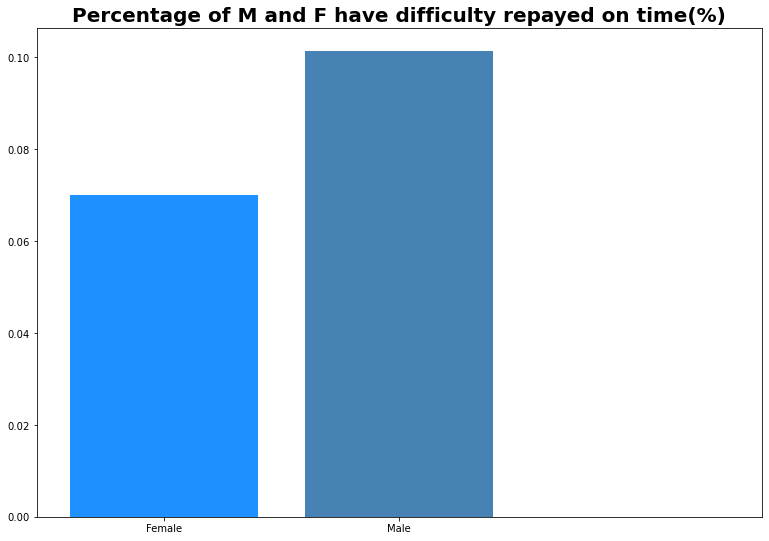

In [35]:

df = pd.DataFrame(perc_m_and_f).reset_index()
df
fig,ax = plt.subplots(figsize = (13,9))
ax.bar(df.index,df.TARGET,color = ["#1E90FF", "#4682B4"])
x= ["Female", 'Male']
plt.xticks([0,1], x)
ax.set_title('Percentage of M and F have difficulty repayed on time(%)', loc='center', size="20",weight = 'bold')


# Mặc dù số lượng Female gần như gấp đôi, nhưng tỉ lệ gặp khó khăn trong việc trả nợ của Male lại là xấp xỉ 10% còn Female là 7%

# Độ Tuổi của những người vay

In [36]:
application_train[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0
...,...,...,...,...,...
307506,-9327,-236,-8456.0,-1982,-273.0
307507,-20775,365243,-4388.0,-4090,0.0
307508,-14966,-7921,-6737.0,-5150,-1909.0
307509,-11961,-4786,-2562.0,-931,-322.0


In [37]:
# Find correlations with the target and sort
correlations = application_train.corr()['TARGET'].sort_values()


print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


In [38]:
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])
application_train['DAYS_BIRTH'].corr(application_train['TARGET'])

-0.07823930830982737

# Nếu để ý , t sẽ thấy rằng đây là ngày, nhưng nó chứa các giá trị âm không hợp lệ. Như vậy, phải convert lại.

# DAYS info

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Defaulter')]

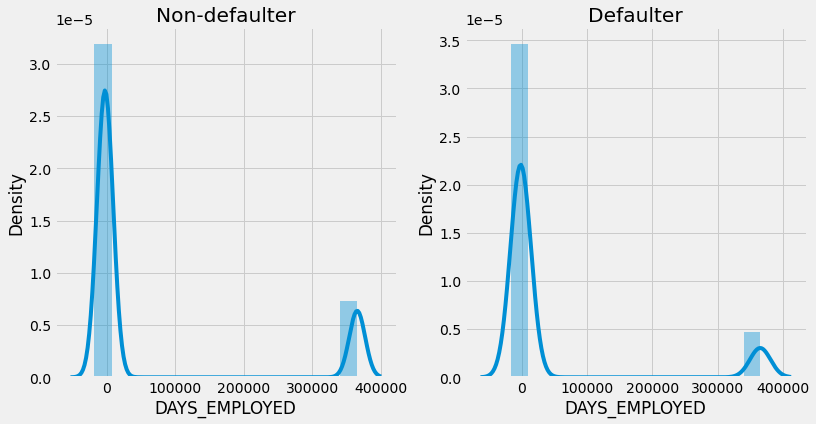

In [66]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(application_train[application_train["TARGET"] == 0]['DAYS_EMPLOYED'], bins= 15, ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(application_train[application_train["TARGET"] == 1]['DAYS_EMPLOYED'], bins= 15, ax= ax[1]).set(title = "Defaulter")

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Defaulter')]

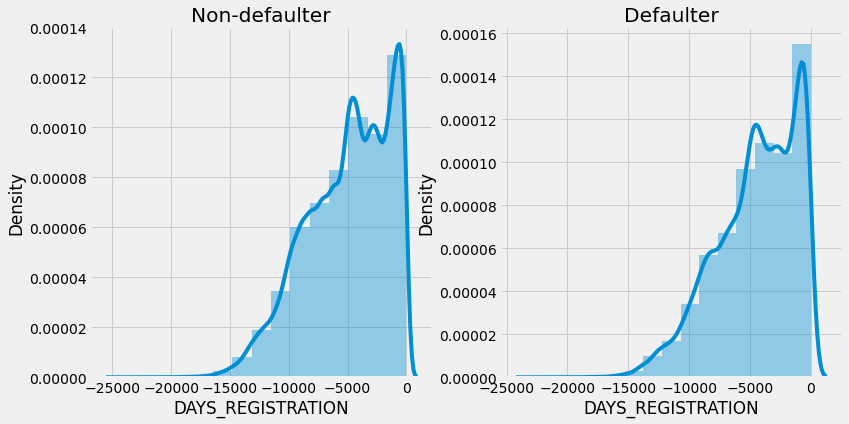

In [67]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(application_train[application_train["TARGET"] == 0]['DAYS_REGISTRATION'], bins= 15, ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(application_train[application_train["TARGET"] == 1]['DAYS_REGISTRATION'], bins= 15, ax= ax[1]).set(title = "Defaulter")

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Defaulter')]

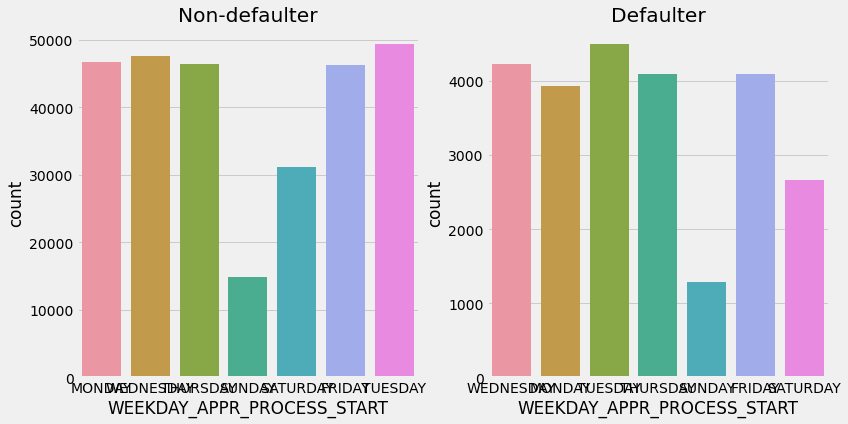

In [68]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(application_train[application_train["TARGET"] == 0]['WEEKDAY_APPR_PROCESS_START'], ax= ax[0]).set(title = "Non-defaulter")
sns.countplot(application_train[application_train["TARGET"] == 1]['WEEKDAY_APPR_PROCESS_START'], ax= ax[1]).set(title = "Defaulter")

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Defaulter')]

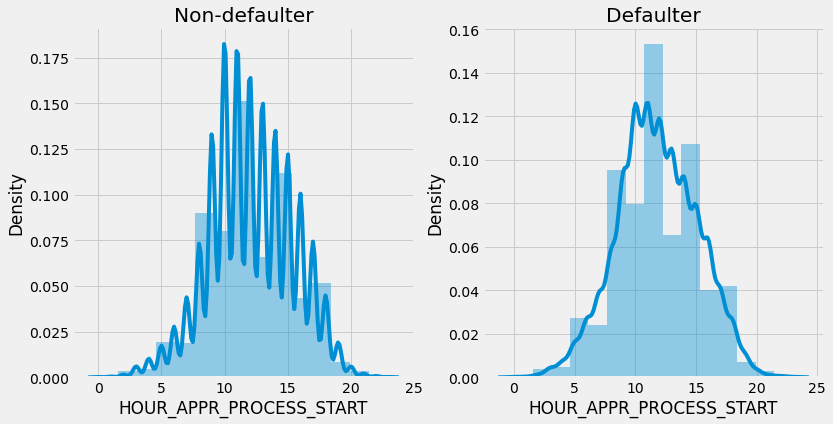

In [70]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(application_train[application_train["TARGET"] == 0]['HOUR_APPR_PROCESS_START'], bins= 15, ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(application_train[application_train["TARGET"] == 1]['HOUR_APPR_PROCESS_START'], bins= 15, ax= ax[1]).set(title = "Defaulter")

# Ngoại trừ Age tất cả feature còn lại distribution giống nhau nên chỉ giữ lại Age

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Defaulter')]

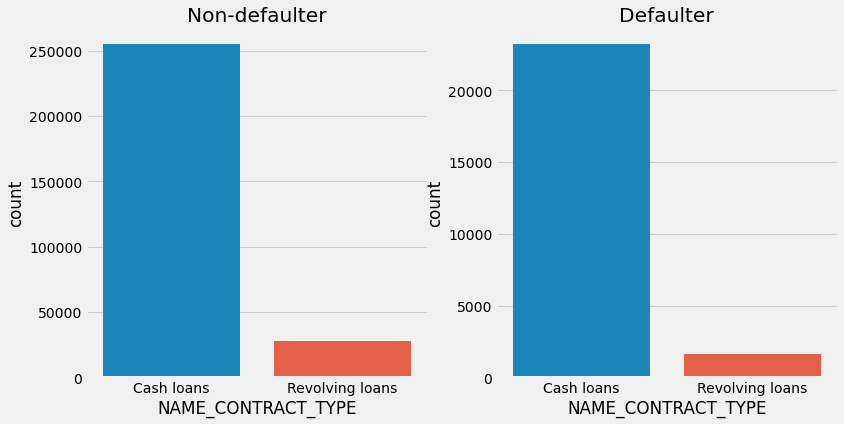

In [72]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(application_train[application_train["TARGET"] == 0]['NAME_CONTRACT_TYPE'], ax= ax[0]).set(title = "Non-defaulter")
sns.countplot(application_train[application_train["TARGET"] == 1]['NAME_CONTRACT_TYPE'], ax= ax[1]).set(title = "Defaulter")

# Contract type Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

# Income and Annuity

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_ANNUITY'>

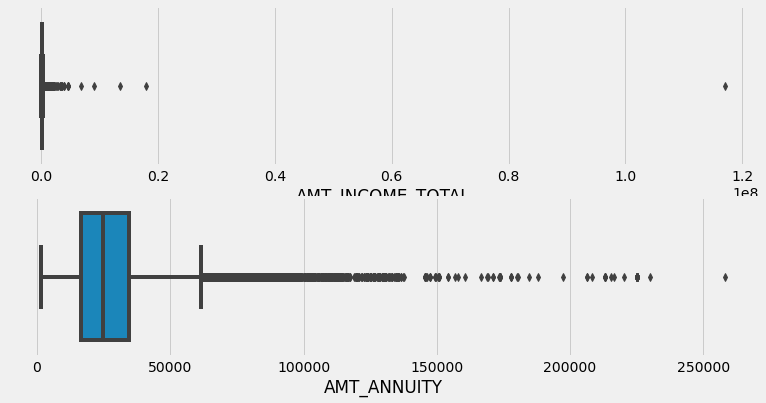

In [79]:
fig, ax = plt.subplots(2,1, figsize= (12,6))
sns.boxplot(application_train['AMT_INCOME_TOTAL'], ax= ax[0])
sns.boxplot(application_train['AMT_ANNUITY'], ax= ax[1])

In [82]:
# Remove outliners 99 percentile
app_train_df = application_train[application_train['AMT_ANNUITY'] < np.nanpercentile(application_train['AMT_ANNUITY'], 99)]
app_train_df = application_train[application_train['AMT_INCOME_TOTAL'] < np.nanpercentile(application_train['AMT_INCOME_TOTAL'], 99)]

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Defaulter')]

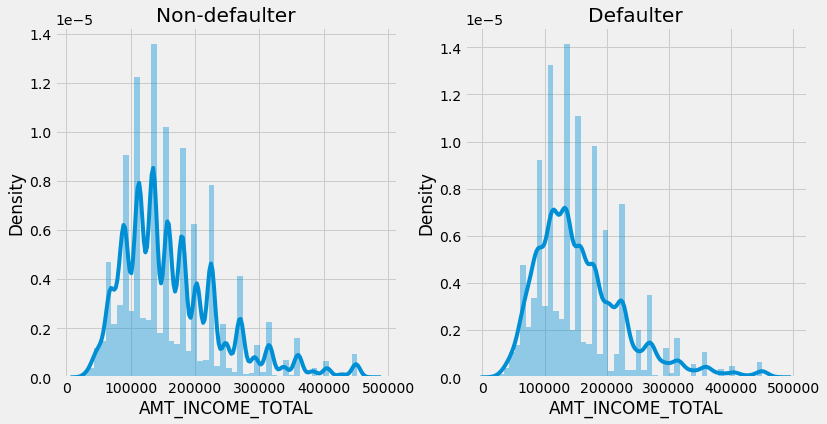

In [83]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(app_train_df[app_train_df["TARGET"] == 0]['AMT_INCOME_TOTAL'], ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(app_train_df[app_train_df["TARGET"] == 1]['AMT_INCOME_TOTAL'], ax= ax[1]).set(title = "Defaulter")

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Defaulter')]

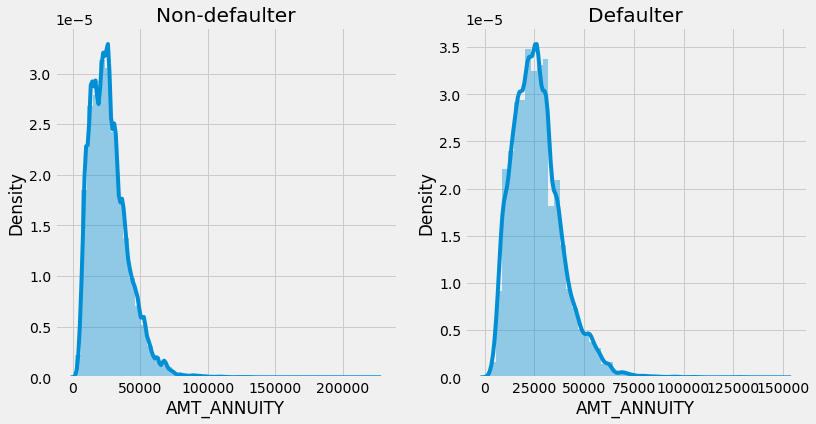

In [84]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(app_train_df[app_train_df["TARGET"] == 0]['AMT_ANNUITY'], ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(app_train_df[app_train_df["TARGET"] == 1]['AMT_ANNUITY'], ax= ax[1]).set(title = "Defaulter")

# Clients having Medium salary range are more likely to apply for the loan for both Defaulters and Non-defaulters.
# Clients having low and medium income are at high risk to default.

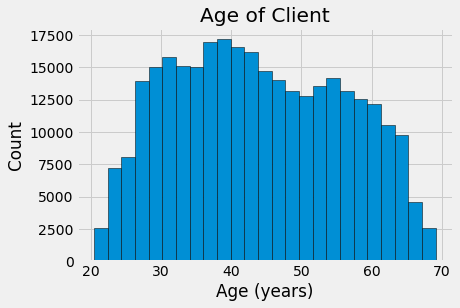

In [39]:
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(application_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

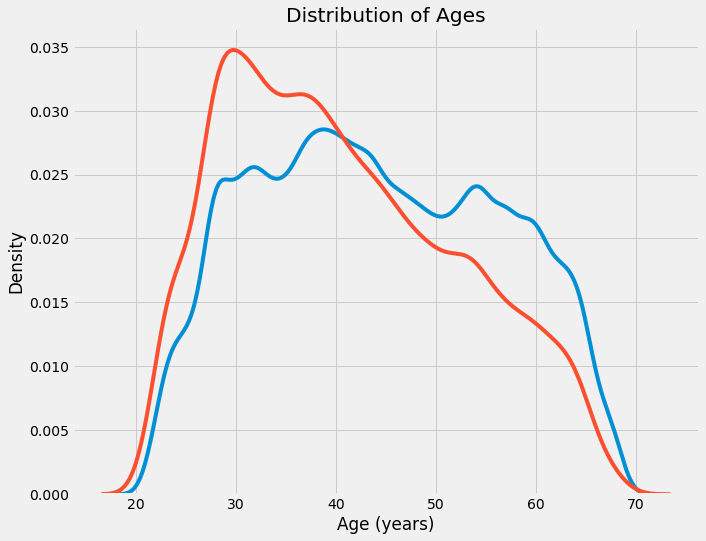

In [40]:
plt.figure(figsize = (10, 8))


sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')


sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

# Mặc dù đây không phải là significant correlation (hệ số tương quan -0,07), nhưng biến này có thể sẽ hữu ích trong mô hình học máy vì nó ảnh hưởng đến TARGET.

In [41]:
age_data = application_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

/var/folders/sh/k0sxj_8d47153mj1tws7b_7h0000gn/T/ipykernel_50536/795581291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
/var/folders/sh/k0sxj_8d47153mj1tws7b_7h0000gn/T/ipykernel_50536/795581291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [42]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


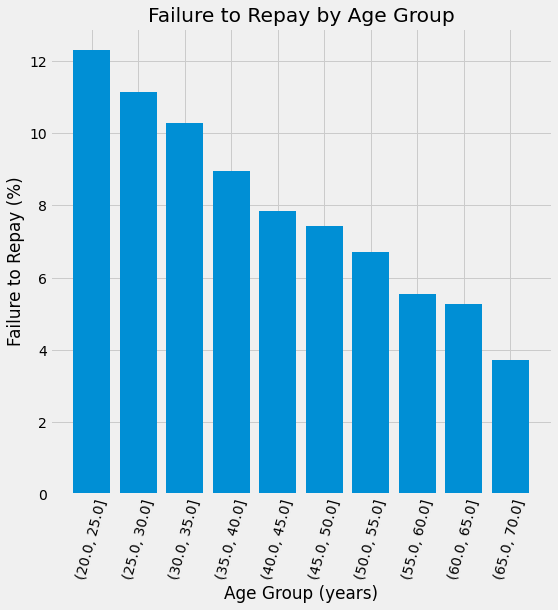

In [43]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

# Có thể thấy những người k trả đc nợ nằm ở quanh ngưỡng 30 tuổi, tuy nhiên số lượng người đó giảm đi khi độ tuổi tăng lên
# Từ đó thấy có thể kết luận rằng những người trẻ thường k có khả năng trả nợ trong thời hạn
# Yếu tố tuổi rất quan trọng nên rất cần cho vào model Machine Learning


# Asset Details

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FLAG_OWN_CAR', ylabel='count'>

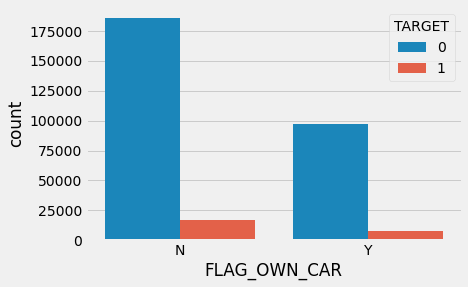

In [46]:
sns.countplot(application_train['FLAG_OWN_CAR'], hue= application_train['TARGET'])

In [47]:
def defaulter_percentage_count_per_cat(df, col):
    summary = []
    for cat in df[col].unique():
        default_count = df[(df[col] == cat) & (df.TARGET == 1)].shape[0]
        total_count = df[df[col] == cat].shape[0]
        summary.append([cat ,default_count * 100 / total_count])

    report_df = pd.DataFrame(summary)
    report_df.columns = ["Categories", "Percentage_Of_Default"]
    return report_df.sort_values(by='Percentage_Of_Default', ascending=False)
defaulter_percentage_count_per_cat(application_train, 'FLAG_OWN_CAR')

,Categories,Percentage_Of_Default
0,N,8.500227
1,Y,7.243730


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FLAG_OWN_REALTY', ylabel='count'>

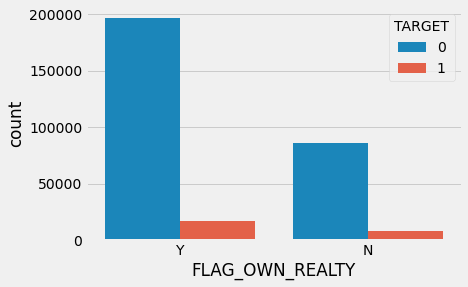

In [49]:
sns.countplot(application_train['FLAG_OWN_REALTY'], hue= application_train['TARGET'])

In [50]:
defaulter_percentage_count_per_cat(application_train, 'FLAG_OWN_REALTY')

,Categories,Percentage_Of_Default
1,N,8.324929
0,Y,7.961577


[Text(0.5, 1.0, 'Defaulter')]

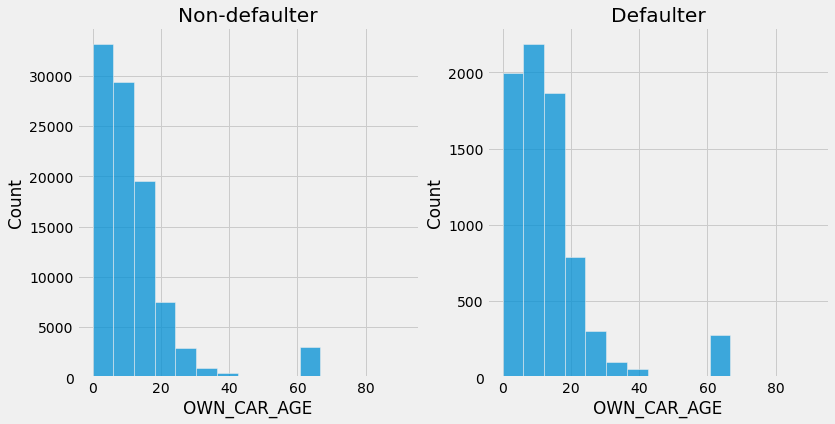

In [52]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.histplot(application_train[application_train["TARGET"] == 0]['OWN_CAR_AGE'], bins= 15, ax= ax[0]).set(title = "Non-defaulter")
sns.histplot(application_train[application_train["TARGET"] == 1]['OWN_CAR_AGE'], bins= 15, ax= ax[1]).set(title = "Defaulter")

# Hầu hết khách hàng sở hữu xe và realty. Những khách hàng không sở hữu có tỉ lệ võ nợ cao hơn 1 vài % nhỏ

# Hầu hết tuổi sở hữu xe hơi nằm trong khoảng 0 - 25 và một số ít 60

# Có thể drop các biến ASSET

# Housing Information

In [53]:
start = application_train.columns.get_loc('APARTMENTS_AVG')
end = application_train.columns.get_loc('EMERGENCYSTATE_MODE')

housing_df = application_train.iloc[:, start : end+1]
housing_df['TARGET'] = application_train["TARGET"]
housing_df['NAME_HOUSING_TYPE'] = application_train["NAME_HOUSING_TYPE"]

In [54]:
check_missed_values(housing_df)

,Feature,Percentage
0,COMMONAREA_MEDI,69.872297
1,COMMONAREA_AVG,69.872297
2,COMMONAREA_MODE,69.872297
3,NONLIVINGAPARTMENTS_MODE,69.432963
4,NONLIVINGAPARTMENTS_MEDI,69.432963
5,NONLIVINGAPARTMENTS_AVG,69.432963
6,FONDKAPREMONT_MODE,68.386172
7,LIVINGAPARTMENTS_MEDI,68.354953
8,LIVINGAPARTMENTS_MODE,68.354953
9,LIVINGAPARTMENTS_AVG,68.354953


# Hầu hết các cột bị null rất nhiều nên ta có thể drop các cột Housing Information

# SOCIAL 

In [56]:
social_df = application_train[["OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"]]

/var/folders/sh/k0sxj_8d47153mj1tws7b_7h0000gn/T/ipykernel_50536/1031162885.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(social_df.corr(), dtype=np.bool)


<AxesSubplot:>

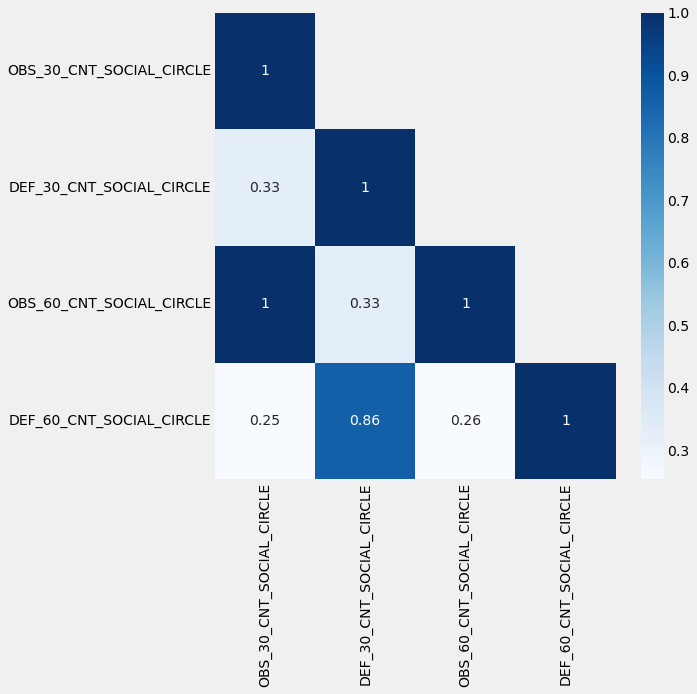

In [57]:
mask = np.zeros_like(social_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
plt.figure(figsize=(8,8))
sns.heatmap(social_df.corr(), annot=True, mask= mask, cmap= "Blues")

# OBS_60_CNT_SOCIAL_CIRCLE và OBS_30_CNT_SOCIAL_CIRCLE là 2 cột giống hệt nhau

# DEF_30_CNT_SOCIAL_CIRCLE và DEF_60_CNT_SOCIAL_CIRCLE có hệ số tương quan cao

# Drop các cột 30

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Defaulter')]

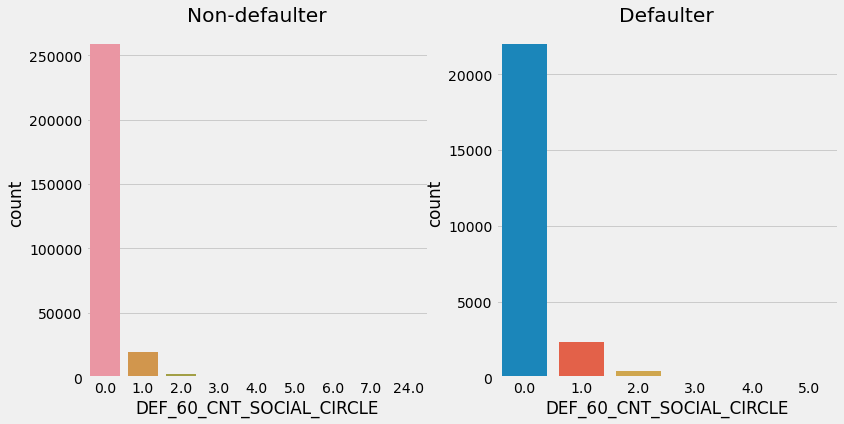

In [59]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(application_train[application_train["TARGET"] == 0]['DEF_60_CNT_SOCIAL_CIRCLE'], ax= ax[0]).set(title = "Non-defaulter")
sns.countplot(application_train[application_train["TARGET"] == 1]['DEF_60_CNT_SOCIAL_CIRCLE'], ax= ax[1]).set(title = "Defaulter")

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Defaulter')]

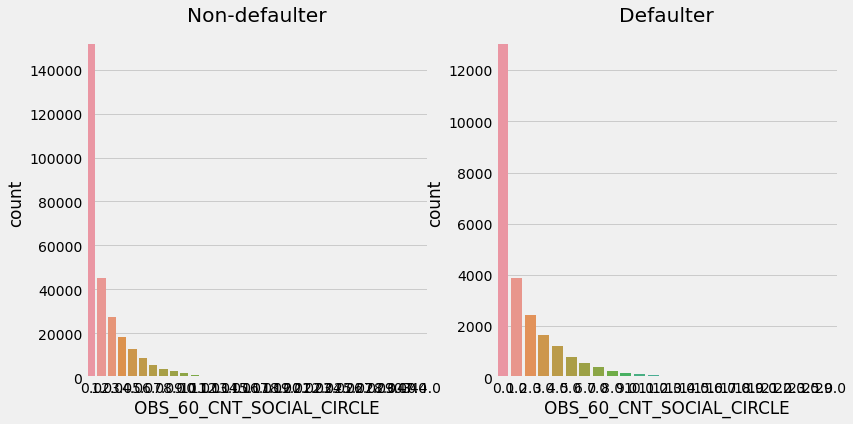

In [60]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(application_train[application_train["TARGET"] == 0]['OBS_60_CNT_SOCIAL_CIRCLE'], ax= ax[0]).set(title = "Non-defaulter")
sns.countplot(application_train[application_train["TARGET"] == 1]['OBS_60_CNT_SOCIAL_CIRCLE'], ax= ax[1]).set(title = "Defaulter")

# Hai feature còn lại cũng có trend giống nhau trong cả 2 trường hợp của biến Target

# Có thể bỏ tất cả các biến Social Info

# Region info

<AxesSubplot:>

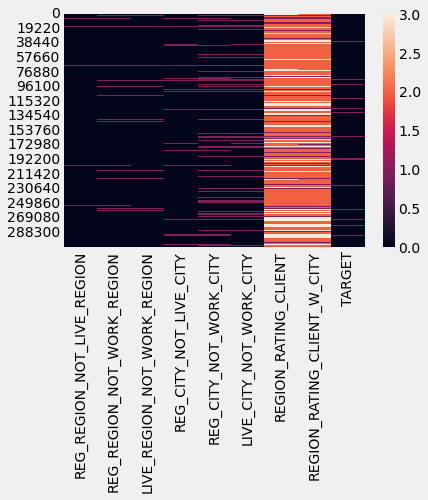

In [61]:
start = application_train.columns.get_loc('REG_REGION_NOT_LIVE_REGION')
end = application_train.columns.get_loc('LIVE_CITY_NOT_WORK_CITY')

region_df = application_train.iloc[:, start : end+1]
region_df['REGION_RATING_CLIENT'] = application_train['REGION_RATING_CLIENT']
region_df['REGION_RATING_CLIENT_W_CITY'] = application_train['REGION_RATING_CLIENT_W_CITY']
region_df['TARGET'] = application_train['TARGET']

sns.heatmap(region_df)

# REG_REGION_NOT_LIVE_REGION chứa hầu hết các giá trị 0 có thể drop

# REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION gần giống nhau có thể loại 1 trong 2

# REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY columns gần giống nhau có thể loại 1 trong 2

# Giữ các cột REG_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY REGION_POPULATION_RELATIVE

# Contact Info

<AxesSubplot:>

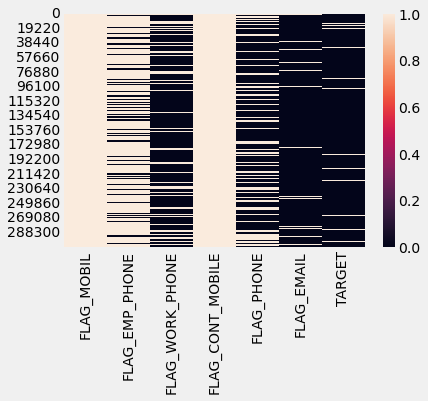

In [62]:
contact_df = application_train[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE', 'TARGET']]
sns.heatmap(contact_df.drop('DAYS_LAST_PHONE_CHANGE', axis=1))


# Family Info

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='count'>

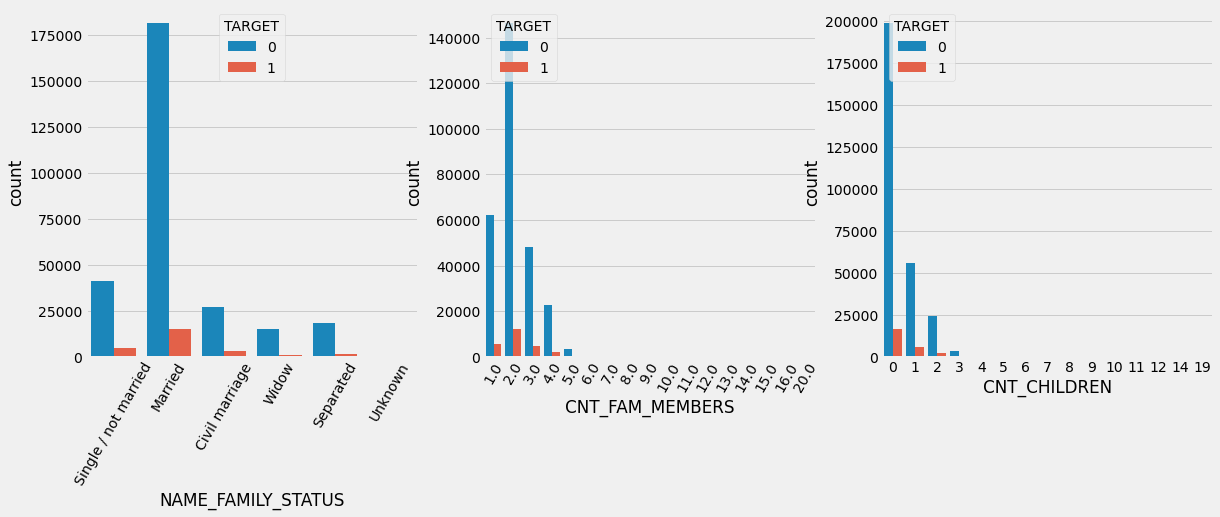

In [63]:
fig, ax = plt.subplots(1,3, figsize= (18,6))
sns.countplot(application_train['NAME_FAMILY_STATUS'], hue=application_train['TARGET'], ax= ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 60)
sns.countplot(application_train['CNT_FAM_MEMBERS'], hue=application_train['TARGET'], ax= ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation= 60)
sns.countplot(application_train['CNT_CHILDREN'], hue=application_train['TARGET'], ax= ax[2])

# Xét về tỷ lệ không trả được nợ, Hôn nhân dân sự có tỷ lệ không trả được cao nhất (10%), với Widow là thấp nhất 
# Đối với khách hàng có 9 hoặc 11 con, tỷ lệ khoản vay không được hoàn trả là 100%.
# Khách hàng có thành viên gia đình gồm 2 người là nhiều nhất, tiếp theo là 1 (người độc thân), 3 (gia đình có một con) và 4. Tuy nhiên số lượng ngày càng ít khi số thành viên tăng lên

# giữ CNT_FAM_MEMBERS CNT_CHILDREN vì tuy distribution giống nhau nhưng 2 và 0 chiếm số lượng lớn


# Education and Occupation info

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

[Text(0, 0, 'Laborers'),
 Text(1, 0, 'Core staff'),
 Text(2, 0, 'Accountants'),
 Text(3, 0, 'Managers'),
 Text(4, 0, 'Drivers'),
 Text(5, 0, 'Sales staff'),
 Text(6, 0, 'Cleaning staff'),
 Text(7, 0, 'Cooking staff'),
 Text(8, 0, 'Private service staff'),
 Text(9, 0, 'Medicine staff'),
 Text(10, 0, 'Security staff'),
 Text(11, 0, 'High skill tech staff'),
 Text(12, 0, 'Waiters/barmen staff'),
 Text(13, 0, 'Low-skill Laborers'),
 Text(14, 0, 'Realty agents'),
 Text(15, 0, 'Secretaries'),
 Text(16, 0, 'IT staff'),
 Text(17, 0, 'HR staff')]

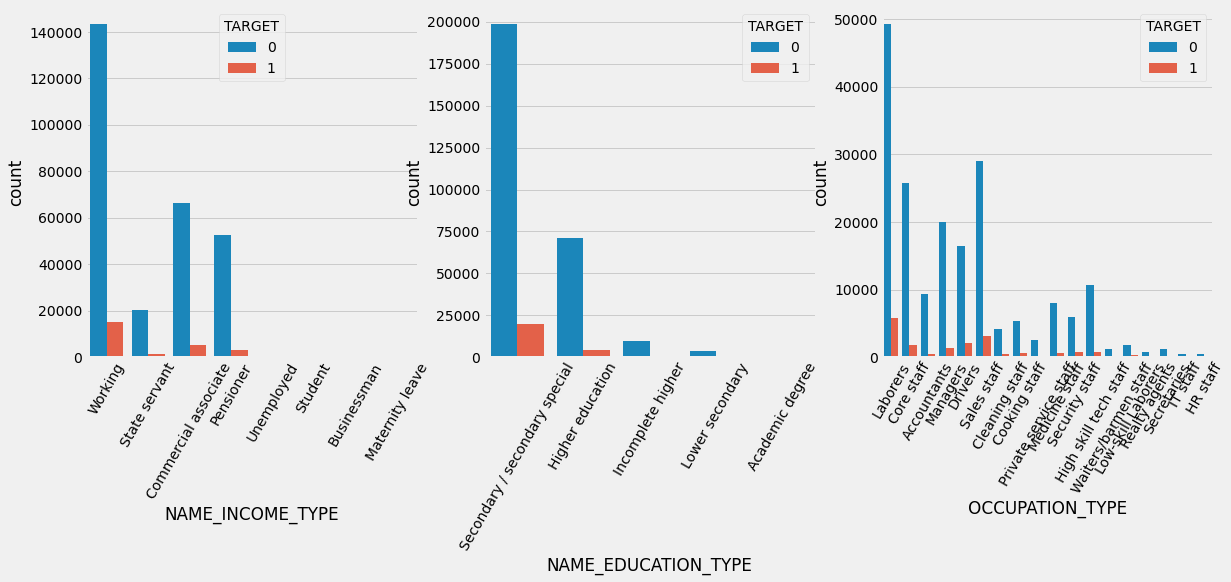

In [64]:
fig, ax = plt.subplots(1,3, figsize= (18,6))
sns.countplot(application_train['NAME_INCOME_TYPE'], hue=application_train['TARGET'], ax= ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 60)
sns.countplot(application_train['NAME_EDUCATION_TYPE'], hue=application_train['TARGET'], ax= ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation= 60)
sns.countplot(application_train['OCCUPATION_TYPE'], hue=application_train['TARGET'], ax= ax[2])
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation= 60)

# Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.
# The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.
# Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant.
 # 3 biến này có thể giữ lại

In [ ]:
nbr_fam_mem = application_train[['CNT_FAM_MEMBERS', 'TARGET']].groupby(['CNT_FAM_MEMBERS'],as_index=False).count()

In [ ]:
nbr_fam_mem

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

color = ["#1E90FF", "#4682B4"]*6

ax.bar(nbr_fam_mem['CNT_FAM_MEMBERS'], nbr_fam_mem['TARGET'])
ax.spines[['top', "right", 'left']].set_visible(True)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')
ax.set_xticks(np.arange(1, 20,1))

ax.set_xlabel('Number', size = "15")
ax.set_title('Số lượng thành viên gia đình của những người đi vay', weight = 'bold', size="22")
ax.set_xlabel('Number', size = "15")



# # Khách hàng có thành viên gia đình gồm 2 người là nhiều nhất, tiếp theo là 1 (người độc thân), 3 (gia đình có một con) và 4. Tuy nhiên số lượng ngày càng ít khi số thành viên tăng lên

In [ ]:
# Tỉ lệ k trả đc nợ 
perc_fam_mem = application_train[['CNT_FAM_MEMBERS', 'TARGET']].groupby(['CNT_FAM_MEMBERS'],as_index=False).mean()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

color = ["#1E90FF", "#4682B4"]*6

ax.bar(perc_fam_mem['CNT_FAM_MEMBERS'], perc_fam_mem['TARGET'],color ='orange')
ax.spines[['top', "right", 'left']].set_visible(True)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')
ax.set_xticks(np.arange(1, 20,1))

ax.set_xlabel('Number', size = "15")
ax.set_title('Những ngừoi k trả đc nợ thường có mấy thành viên trong gia đình', weight = 'bold', size="22")
ax.set_xlabel('Number', size = "15")




# Có 2 khách hàng có quy mô gia đình 11 và 13, cả 2 người đấy đều k trả  đc nợ nên tỷ lệ không trả nợ là  100%. Các gia đình khác có 10 hoặc 8 thành viên có tỷ lệ không trả được nợ trên 30%. Các gia đình có 6 thành viên trở xuống có tỷ lệ trả nợ gần mức trung bình 10%.

In [85]:
application_train[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30)

,ORGANIZATION_TYPE,NAME_INCOME_TYPE
0,Business Entity Type 3,Working
1,School,State servant
2,Government,Working
3,Business Entity Type 3,Working
4,Religion,Working
5,Other,State servant
6,Business Entity Type 3,Commercial associate
7,Other,State servant
8,XNA,Pensioner
9,Electricity,Working


# Ở đây, ta thấy rằng bất cứ nơi nào NAME_INCOME_TYPE là Pensioner thì ở đó chỉ chúng ta có giá trị null trong cột ORGANIZATON_TYPE. Hãy xem số lượng Pensioner và sau đó chúng tôi sẽ quyết định có áp dụng giá trị rỗng của ORGANIZATION_TYPE với Pensioner hay không.

In [86]:
application_train.NAME_INCOME_TYPE.value_counts()    #Check the counts for each in NAME_INCOME_TYPE

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

# Vì vậy, từ những dữ liệu này, ta có thể kết luận rằng giá trị Pensioner xấp xỉ bằng giá trị rỗng trong cột ORGANIZATION_TYPE. Vì vậy, giá trị bị thiếu ở mức nào đó
# Tương tự như vậy việc áp giá trị rỗng của OCCUPATION_TYPE với Pensioner vì hầu hết các giá trị rỗng cho OCCUPATION_TYPE so với giá trị biến loại Income, ta nhận thấy rằng “Pensioner” là giá trị thường xuyên nhất, gần như 80% giá trị rỗng của OCCUPATION_TYPE

In [87]:
#application_train['ORGANIZATION_TYPE'] = application_train['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')
#application_train['OCCUPATION_TYPE'].fillna('Pensioner' , inplace = True)

In [88]:
nbr_icome_type = application_train[['NAME_INCOME_TYPE', 'TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).count()

In [89]:
nbr_icome_type

,NAME_INCOME_TYPE,TARGET
0,Businessman,10
1,Commercial associate,71617
2,Maternity leave,5
3,Pensioner,55362
4,State servant,21703
5,Student,18
6,Unemployed,22
7,Working,158774


Text(0.5, 0, 'Number')

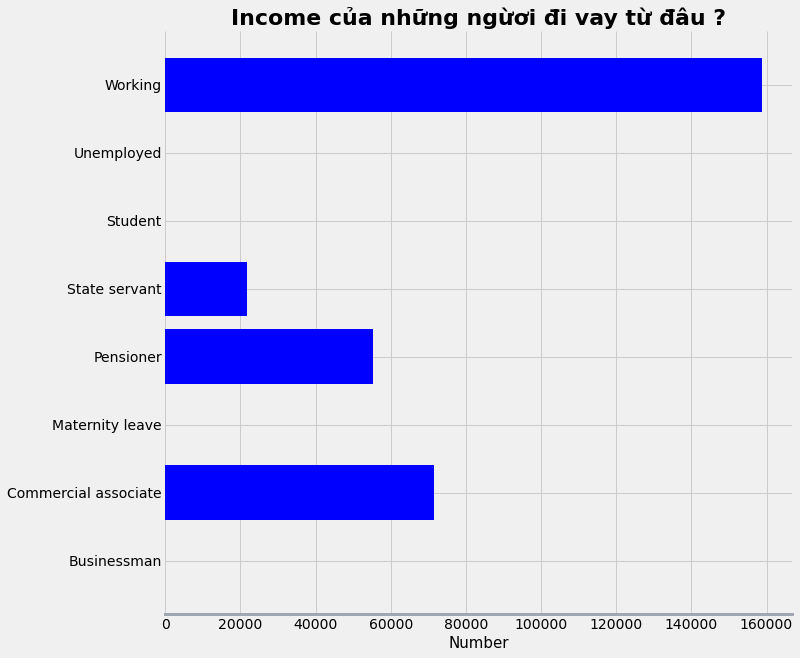

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))

color = ["#1E90FF", "#4682B4"]*6

ax.barh(nbr_icome_type['NAME_INCOME_TYPE'], nbr_icome_type['TARGET'],color ='blue')
ax.spines[['top', "right", 'left']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')


ax.set_xlabel('Number', size = "15")
ax.set_title('Income của những ngừơi đi vay từ đâu ?', weight = 'bold', size="22")
ax.set_xlabel('Number', size = "15")


# # Hầu hết những người nộp đơn cho khoản vay là thu nhập từ Working, tiếp theo là Commercial asscociate, Pensioner và State servant 

In [91]:
perc_income_type = application_train[['NAME_INCOME_TYPE', 'TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean()

Text(0.5, 0, '%')

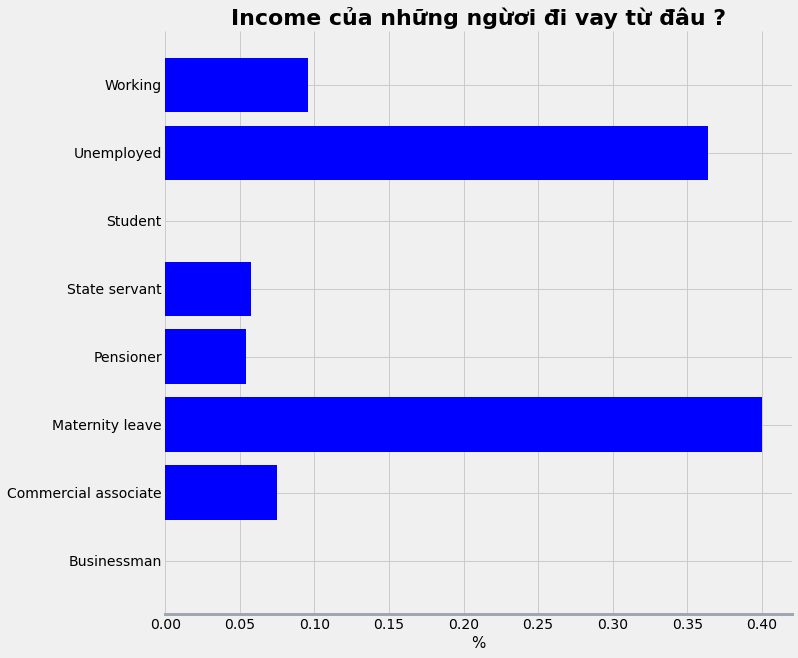

In [92]:
fig, ax = plt.subplots(figsize=(10, 10))

color = ["#1E90FF", "#4682B4"]*6

ax.barh(perc_income_type['NAME_INCOME_TYPE'], perc_income_type['TARGET'],color ='blue')
ax.spines[['top', "right", 'left']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')



ax.set_title('Income của những ngừơi đi vay từ đâu ?', weight = 'bold', size="22")
ax.set_xlabel('%', size = "15")



# Những người nộp đơn với loại thu nhập Nghỉ thai sản có tỷ lệ không trả lại khoản vay gần 40%, tiếp theo là Thất nghiệp (37%). Các loại thu nhập còn lại đều ở mức trung bình dưới 10% do không trả lại các khoản cho vay.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

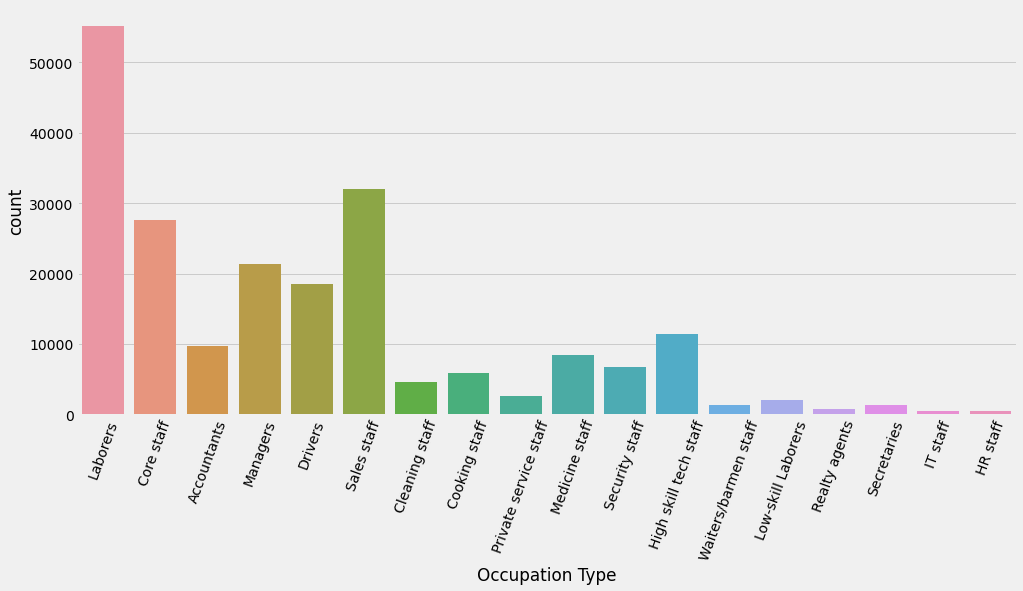

In [93]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='OCCUPATION_TYPE',data=application_train)
plt.xlabel("Occupation Type")
plt.xticks(rotation=70)

# Hầu hết người đi vay là người lao động và ít nhất là Nhân viên IT

In [94]:
perc_occupation_type = application_train[['OCCUPATION_TYPE', 'TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean()

Text(0.5, 0, '%')

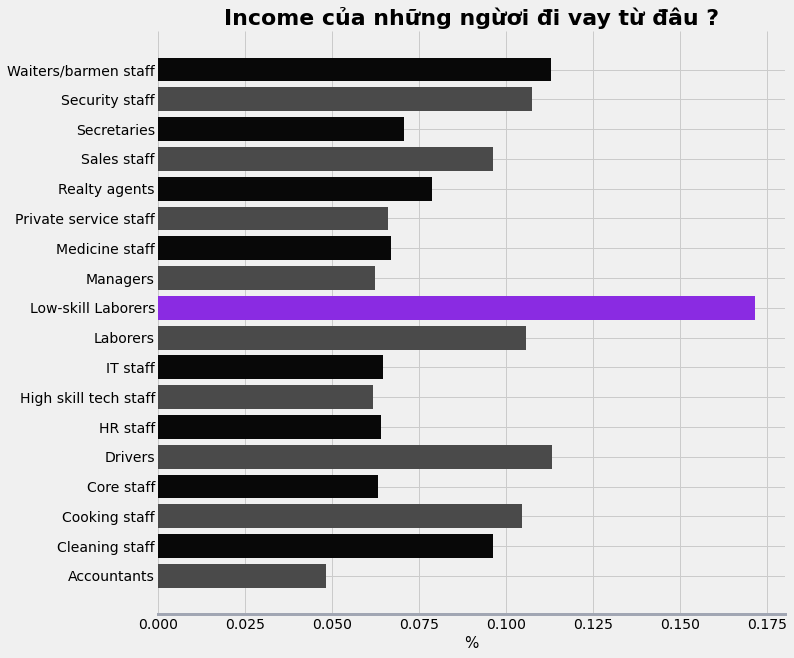

In [95]:
fig, ax = plt.subplots(figsize=(10, 10))

color = ['#4A4A4A', "#080808"]*9
color[9] = "#8A2BE2"

ax.barh(perc_occupation_type['OCCUPATION_TYPE'], perc_occupation_type['TARGET'],color =color)
ax.spines[['top', "right", 'left']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')



ax.set_title('Income của những ngừơi đi vay từ đâu ?', weight = 'bold', size="22")
ax.set_xlabel('%', size = "15")


# Nhóm có tỷ lệ khoản vay không được hoàn trả cao nhất là Lao động trình độ thấp (trên 17%), tiếp theo là Lái xe và Nhân viên phục vụ / barmen, Nhân viên bảo vệ, Nhân viên lao động và Nhân viên nấu ăn.

Text(0, 0.5, 'Average Annual family income')

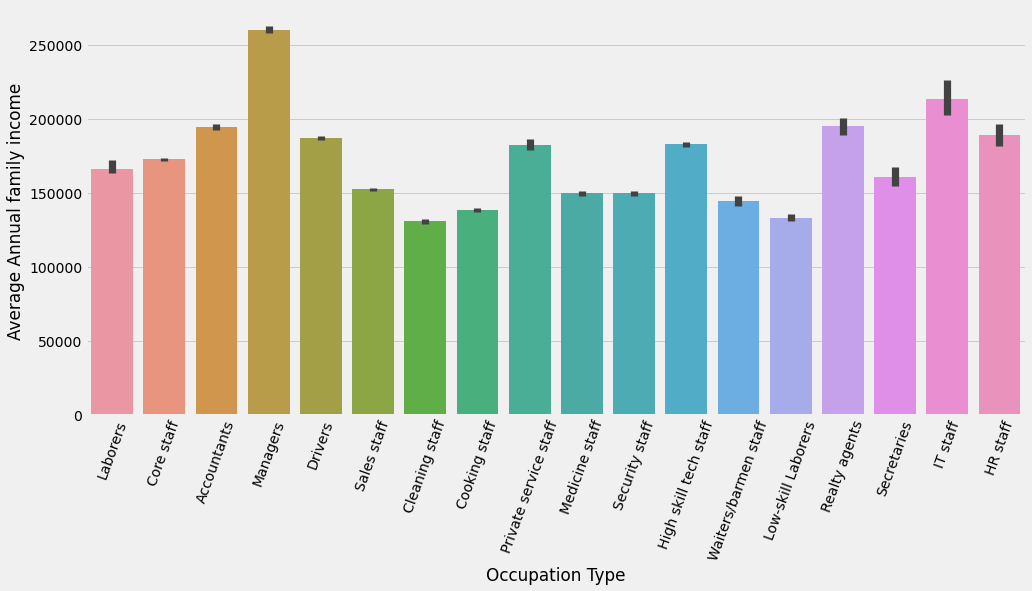

In [96]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',data=application_train)
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.ylabel("Average Annual family income")

# Những người đi vay có kinh tế như thế nào? Ai là người ổn định nhất và kém nhất?

# Manager là người đi vay kiếm nhiều tiền nhất trong khi nhân viên dọn vệ sinh là người đi vay kiếm tiền ít nhất - Dựa trên thu nhập hàng năm của gia đình.

In [97]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

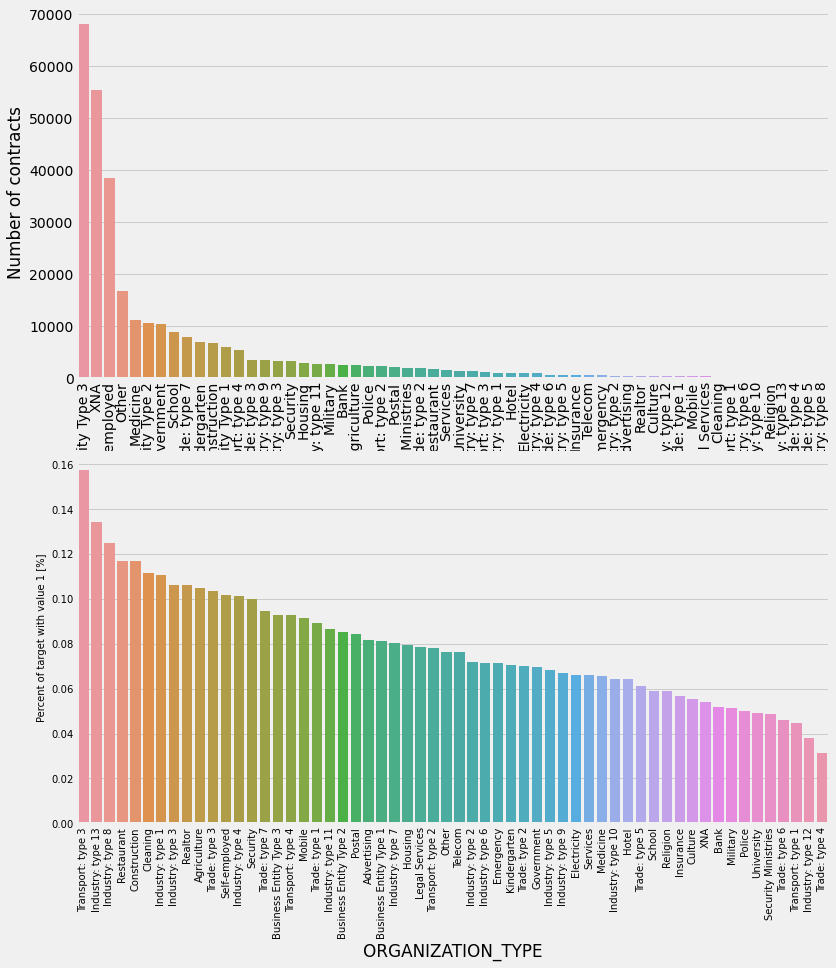

In [98]:
plot_stats('ORGANIZATION_TYPE',True, False)

# Các tổ chức có tỷ lệ nợ không hoàn trả cao nhất là Transport: type 3 (16%), Indusrty: type 13 (13,5%), Industry: type 8 (12,5%) và Restaurant (dưới 12%).

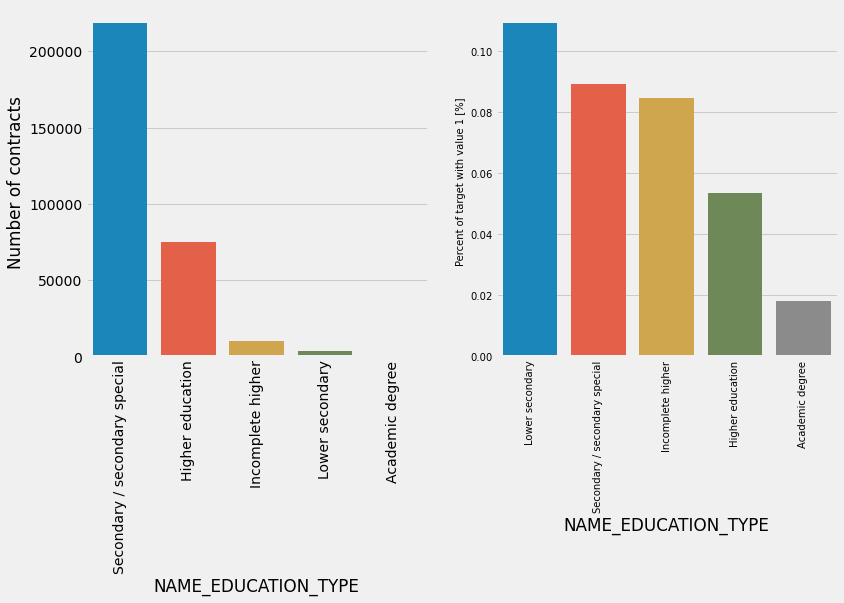

In [99]:
plot_stats('NAME_EDUCATION_TYPE',True)

# Đa số người vay có trình độ trung học cơ sở / trung học đặc biệt, tiếp theo là các khách hàng có trình độ đại học. Chỉ một số rất nhỏ có bằng cấp.

# Nhóm trung học cơ sở, mặc dù hiếm, có tỷ lệ không trả lại khoản vay lớn nhất (11%). Những người có bằng Học vấn có tỷ lệ không hoàn trả dưới 2%.

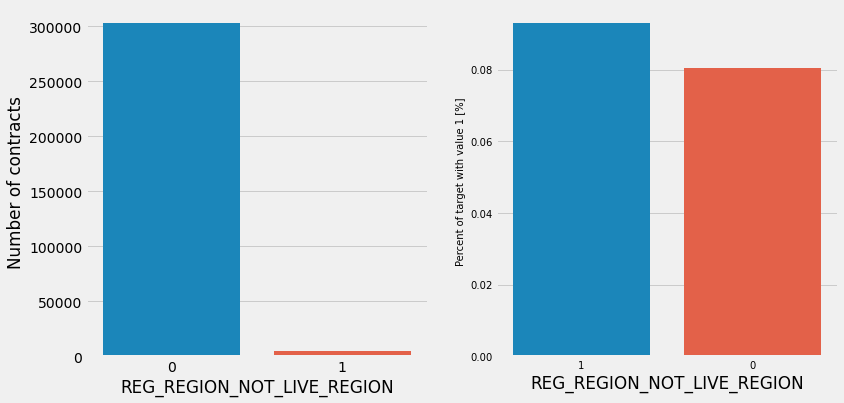

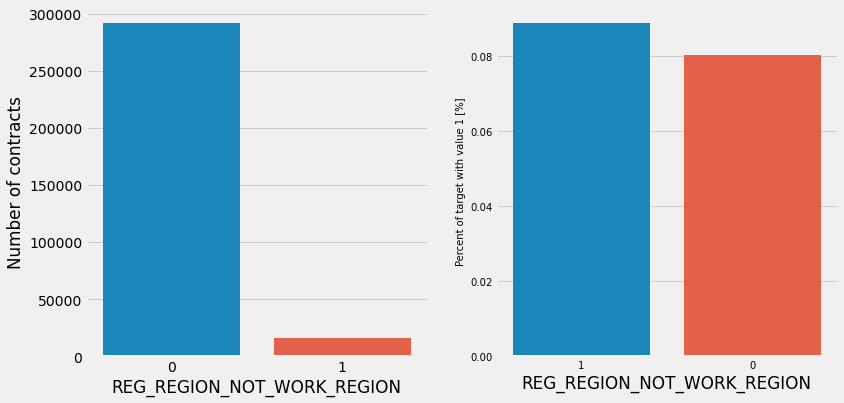

In [100]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

# Rất ít người được đăng ký trong khu vực không sinh sống hoặc không làm việc. Nói chung, tỷ lệ không quay lại đối với những trường hợp này lớn hơn một chút so với những trường hợp còn lại (trên 8% một chút so với khoảng 8%)

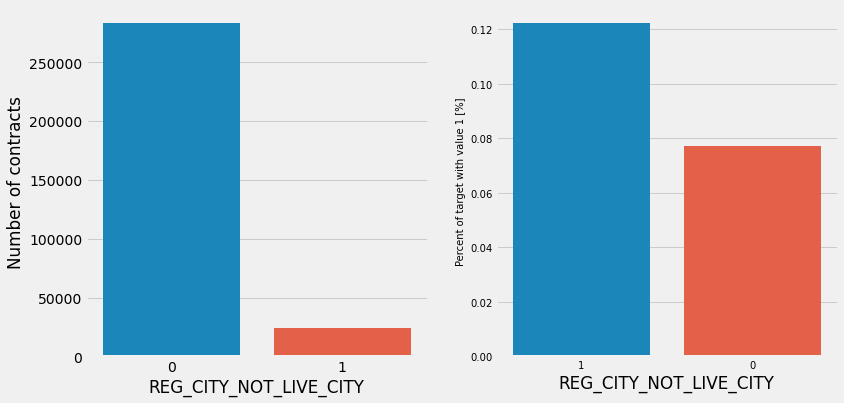

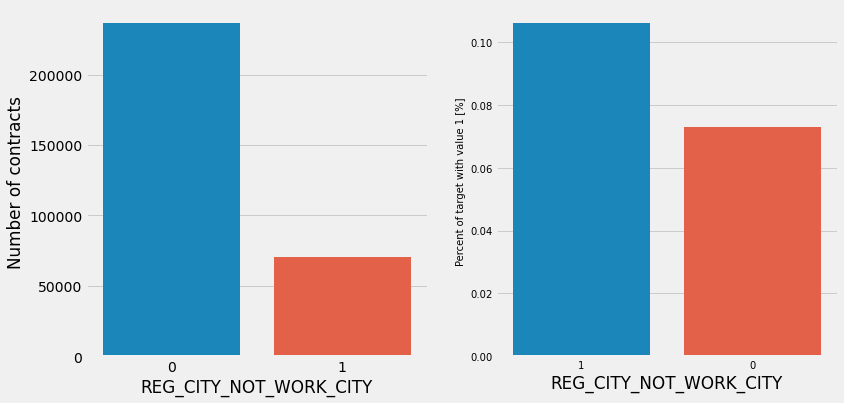

In [101]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')

# Nói chung, có nhiều người đăng ký tại thành phố họ sống hoặc làm việc hơn (một số lượng lớn đăng ký ở thành phố làm việc khác với thành phố đang sống).

# Những người đăng ký ở thành phố khác với thành phố đang làm việc hoặc sinh sống thường không trả được khoản vay hơn những người đăng ký cùng thành phố (nơi làm việc 11% hoặc sinh sống 12%).

# EXT_SOURCE

In [103]:
ext_data = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


# All three EXT_SOURCE features have negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan. We can also see that DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that maybe one of the factors in this score is the client age.


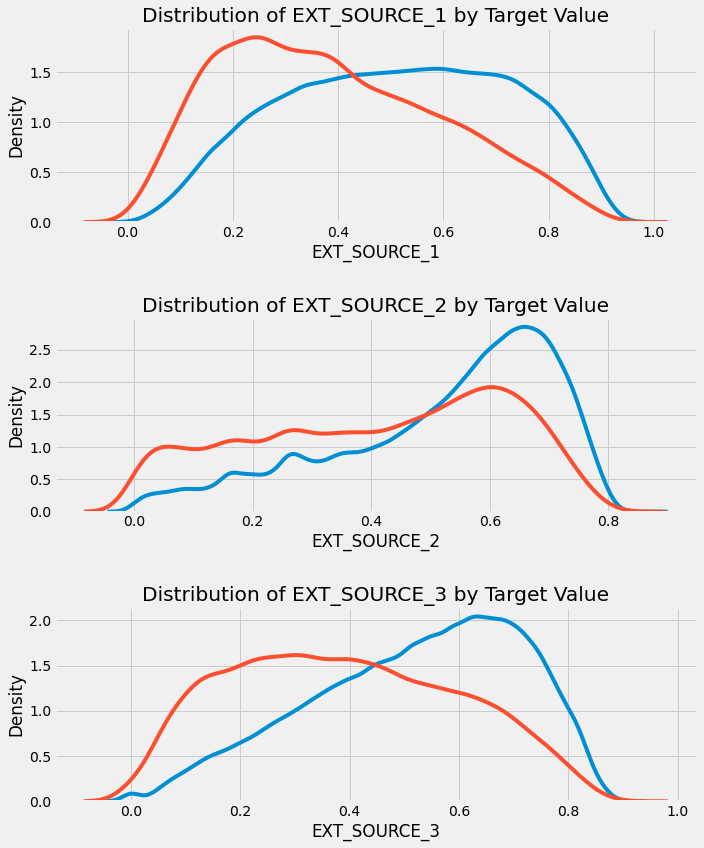

In [102]:
plt.figure(figsize = (10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, source], label = 'target == 1')
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density')

plt.tight_layout(h_pad = 2.5)

# Note that ‘Ext_Source_1’ is a Normalised Score from an External Data Source -1, and when we check for the number of nulls for this field (not shown here), we see that nearly 56% of the entries in the ‘Ext_Source_1’ column are null (empty) values, and hence we will take a look at the remaining values only. Note that we can carry out replacement of these values with the Mean or Median or Mode for the entire numerical column but since this is a large number of nulls, we will not follow this approach for this field. This is the first feature that we have seen so far where there is some considerable difference among the 2 classes, as we can see from the PDF plot. Therefore, ‘Ext_Source_1’ is going to be an important feature.


# EXT_SOURCE_3 displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong. In fact they are all considered very weak, but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.
